# The many faces of the Reverend Bayes: Face 2.

with many parts stolen from labs and lectures for AM207.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

1 1
1 2
2 2
2 3
2 4
3 4
5 5
10 7
22 30
251 251


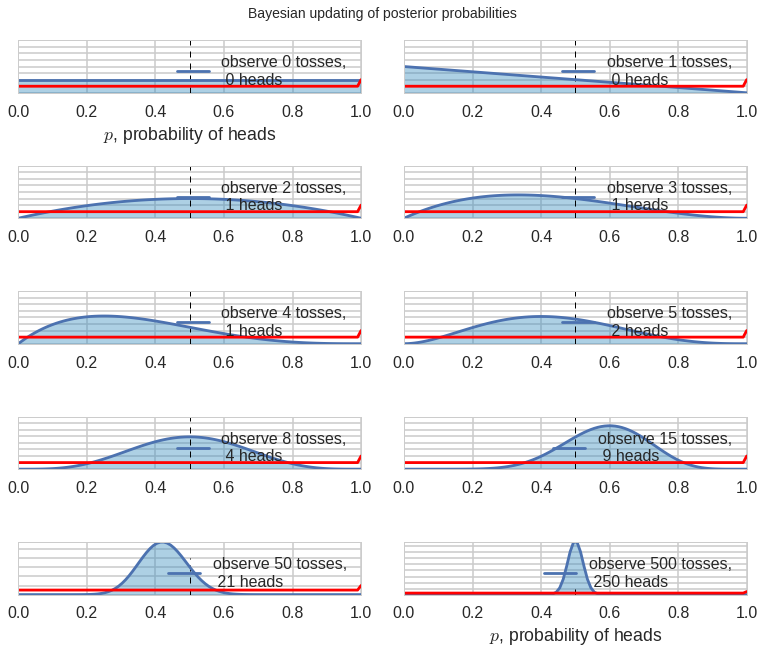

In [10]:
plt.figure(figsize=(11, 9))

import scipy.stats as stats

beta = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #posterior distribution.
    y = beta.pdf(x, 1 + heads, 1 + N - heads)
    print 1 + heads, 1 + N - heads
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
   

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

## The Normal Model

 
 A random variable $Y$ is said to be normally distributed with mean $\mu$ and variance $\sigma^2$ if the 
 density of $Y$ is given by 
 $$ p(y|\mu, \sigma^2) =  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{y-\mu}{2 \sigma})^2} $$
 
 
Suppose our model is $\{y_1, \ldots, y_n|\mu, \sigma^2 \} \sim N(\mu, \sigma^2)$ then
the likelihood is 

$$
p(y_1, \ldots, y_n| \mu, \sigma^2) = 
\prod_{i=1}^{n} p(y_i| \mu, \sigma^2)=\prod_{i=1}^{n}  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{(y_i-\mu)^2}{2\sigma^2})} = 
\frac{1}{ \sqrt{ 2 \pi \sigma^2}}   \exp \left\{  - \frac{1}{2}  \sum_i \frac{(y_i-\mu)^2}{\sigma^2} \right\} 
$$

Lets see the posterior of $\mu$ assuming we 
know $\sigma^2$.  

For any conditional prior the posterior 

$$ p( \mu |  y_1, \ldots, y_n, \sigma^2)  \propto p(\mu| \sigma^2) \,e^{ - \frac{1}{2\sigma^2} \sum (y_i - \mu)^2 }$$


The conjugate of the normal is the normal itself. 

Say we have the prior

$$ p(\mu | \sigma^2) = \exp \left\{ -\frac{1}{2 \tau^2} (\hat{\mu}-\mu)^2 \right\} $$

then it can be shown that the posterior is 

$$  p( \mu |  y_1, \ldots, y_n, \sigma^2) \propto \exp \left\{ -\frac{a}{2} (\mu-b/a)^2 \right\} $$
where 
$$ a = \frac{1}{\tau^2} + \frac{n}{\sigma^2} , \;\;\;\;\; b = \frac{\hat{\mu}}{\tau^2} + \frac{\sum y_i}{\sigma^2} $$
This is a normal density curve with $1/\sqrt{a}$ playing the role of the 
standard deviation and $b/a$ playing the role of the mean. Re-writing this, 

$$ p( \mu |  y_1, \ldots, y_n, \sigma^2)  \propto \exp\left\{ -\frac{1}{2} \left( \frac{\mu-b/a}{1/\sqrt(a)}\right)^2 \right\} $$


Define $\kappa = \sigma^2 / \tau^2 $ to be the variance of the sample model  in units of variance
of our prior belief (prior distribution) then the posterior mean  

$$\mu_p = \frac{ \kappa}{\kappa + n }  \hat{\mu} + \frac{n}{\kappa + n} \bar{y} $$

which is a weighted average of prior mean and sampling mean.
The variance is 

$$ \tau_p^2 = \frac{1}{1/\tau^2+n/\sigma^2} $$
or better 

$$ \frac{1}{\tau_p^2} = \frac{1}{\tau^2} + \frac{n}{\sigma^2} $$

###Gaussian with known $\sigma$

(this is an example from AM207)

Define $\kappa=\frac{\sigma^2}{\tau^2}$ to be the variance of the sample model in units of variance of our prior belief (prior distribution) then the posterior mean

$$\mu_{p} = \frac{\kappa}{\kappa + n} \mu_{prior} + \frac{n}{\kappa + n} \bar{y}$$

which is a weighted average of prior mean and sampling mean. The variance is

$$\frac{1}{\tau_p^2} = \frac{1}{\tau^2} + \frac{1}{\sigma^2}$$

We have data on the wing length in millimeters of a nine members of a particular species of moth. We wish to make inferences from those measurements on the population mean $\mu$. Other studies show the wing length to be around 19 mm. We also know that the length must be positive. We can choose a prior that is normal and most of the density is above zero ($\mu=19.5,\tau=10$). This is only a **marginally informative** prior.

Many bayesians would prefer you choose relatively uninformative priors.

The measurements were: 16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8 giving $\bar{y}=18.14$. 

Using the formulas above we have ($\kappa = \frac{\sigma^2}{100}$) and 
say $\sigma^2=s^2=1.9928$ then the posterior is $N(18.14,0.47)$. Note this is for a KNOWN $\sigma$.

In [12]:
Y = [16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8]
# Prior mean
mu_prior = 19.5
# prior std
tau = 10 
N = 15000

In [13]:
#Data Quantities
sig = np.std(Y) # assume that is the value of KNOWN sigma (in the likelihood)
mu_data = np.mean(Y)

print mu_data

n = len(Y)
kappa = sig**2 / tau**2
sig_post =np.sqrt(1./( 1./tau**2 + n/sig**2));
# posterior mean
mu_post = kappa / (kappa + n) *mu_prior + n/(kappa+n)* mu_data

#samples
theta_prior = np.random.normal(loc=mu_prior, scale=tau, size=N);
theta_post = np.random.normal(loc=mu_post, scale=sig_post, size=N);

18.1444444444


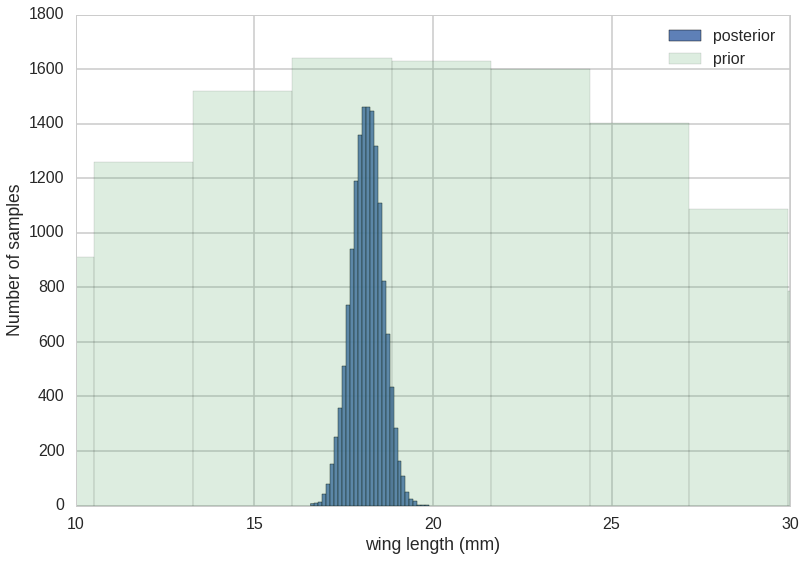

In [5]:
plt.hist(theta_post, bins=30, alpha=0.9, label="posterior");
plt.hist(theta_prior, bins=30, alpha=0.2, label="prior");
plt.xlim([10, 30])
plt.xlabel("wing length (mm)")
plt.ylabel("Number of samples")
plt.legend();

## Kidney Cancer

This is part of a dataset that Joe talked about in class. Its a dataset about counties in the US, and has information about kidney cancer fatalities over 5 years on a per county basis. This is stored in the variable `dc` below. The `pop` is the county population, and the 5 year mortaility is calculated by just dividing one by the other.

In [15]:
dfk=pd.read_csv("lab9stuff/kcancer.csv")
dfk.head()

,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


We've written some code, based on code in https://github.com/dataiap/dataiap/blob/master/resources/util/map_util.py to map what this looks like.

In [18]:
import simplejson as json
with open('lab9stuff//us_state_map.geojson','r') as fp:
    statedata = json.load(fp)
with open('lab9stuff//us_county_map.geojson','r') as fp:
    data = json.load(fp)

In [19]:
from collections import defaultdict
fips2poly = defaultdict(list)
blues = ['#FFF7FB', '#ECE7F2', '#D0D1E6', '#A6BDDB', '#74A9CF',
         '#3690C0', '#0570B0', '#045A8D', '#023858']
_color_idx = 0
def draw_polygon(subplot, coords, **kwargs):
    xs, ys = zip(*coords)
    kwargs['alpha']=0.5
    subplot.fill(xs, ys, **kwargs)
def draw_county(subplot, fips, **kwargs):
    """
    draw_county(subplot, fips, color=..., **kwargs)
    
    Automatically draws a filled shape representing the county with id fips in
    subplot.  The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    The fips id is described at http://en.wikipedia.org/wiki/FIPS_county_code
    """
    global _color_idx
    if fips not in fips2poly:
        #raise RuntimeError, 'County fips %s not found' % fips
        print 'County fips %s not found' % fips
        return
    if 'color' not in kwargs:
        color = blues[_color_idx]
        _color_idx = (_color_idx+1) % len(blues)
        kwargs['color'] = color
    for polygon in fips2poly[fips]:
        draw_polygon(subplot, polygon, **kwargs)

for f in data['features']:
    fips = f['properties']['GEOID']
    fips = int(fips)
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            fips2poly[fips].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            fips2poly[fips].extend(polygon)

In [20]:
state2poly = defaultdict(list)
for f in statedata['features']:
    state = f['properties']['NAME']
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)

In [21]:
def draw_state(subplot, name, **kwargs):
    """
    draw_state(subplot, state, color=..., **kwargs)
    
    Automatically draws a filled shape representing the state in
    subplot.  *state* is the full name of the state, as defined by USPS
    (https://www.usps.com/send/official-abbreviations.htm).
    The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    """
    global _color_idx
    if name not in state2poly:
        if get_statename(name) in state2poly:
            name = get_statename(name)
        else:
            print "state %s not found" % name
            return

    kwargs['color'] = "#FFFFFF"
    for polygon in state2poly[name]:
        draw_polygon(subplot, polygon, **kwargs)

In [22]:
def make_map(countyseries, skip=[], stateskip=['Alaska', 'Hawaii'], color=None, ax=None):
    if not ax:
        fig = plt.figure(figsize=(16, 12))
        ax = plt.gca()

        for state in state2poly.keys():
            if state in stateskip:
                continue
            draw_state(ax, state,  ec='k')
        
    for county in countyseries:
        if county in skip:
            continue
        if color:
            draw_county(ax, county,  ec='k', color=color)
        else:
            draw_county(ax, county,  ec='k') 

    
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_xlim(-180, -60)
    ax.set_xlim(-132, -60)
    ax.set_ylim(20, 59)
    return ax

We look for the counties with the highest rate of cancer. Perhaps these are poorer, rural, with poor access to hospitals?

In [23]:
top_kcancer_counties = dfk.sort(columns='pct_mortality',ascending=False)[:323]

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


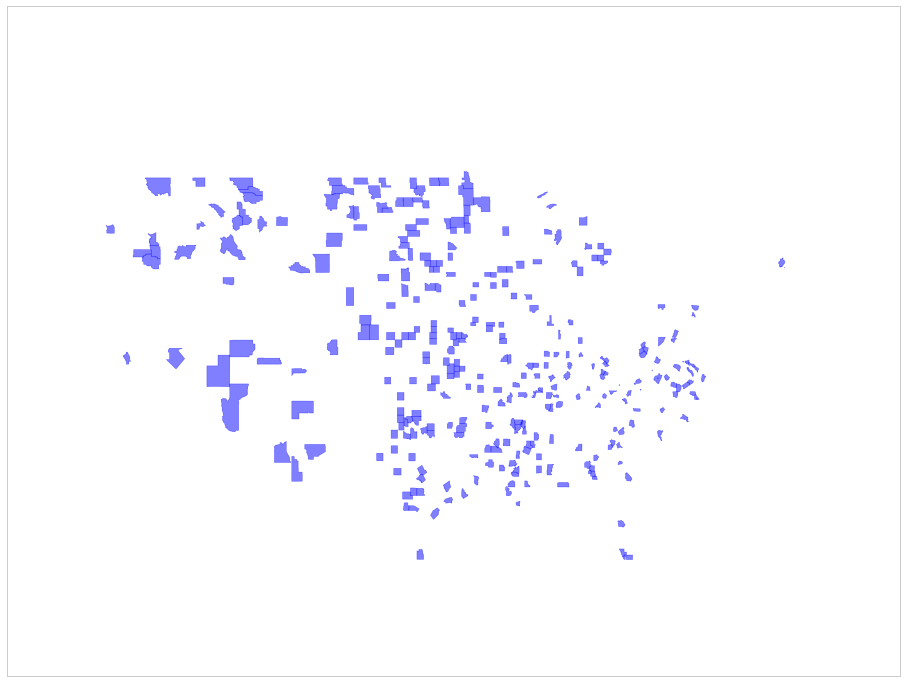

In [24]:
make_map(top_kcancer_counties.countyfips, color="blue")

What about the counties with the lowest rate of cancer? Let us plot those as well..

In [25]:
bot_kcancer_counties = dfk.sort(columns='pct_mortality',ascending=True)[:323]

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


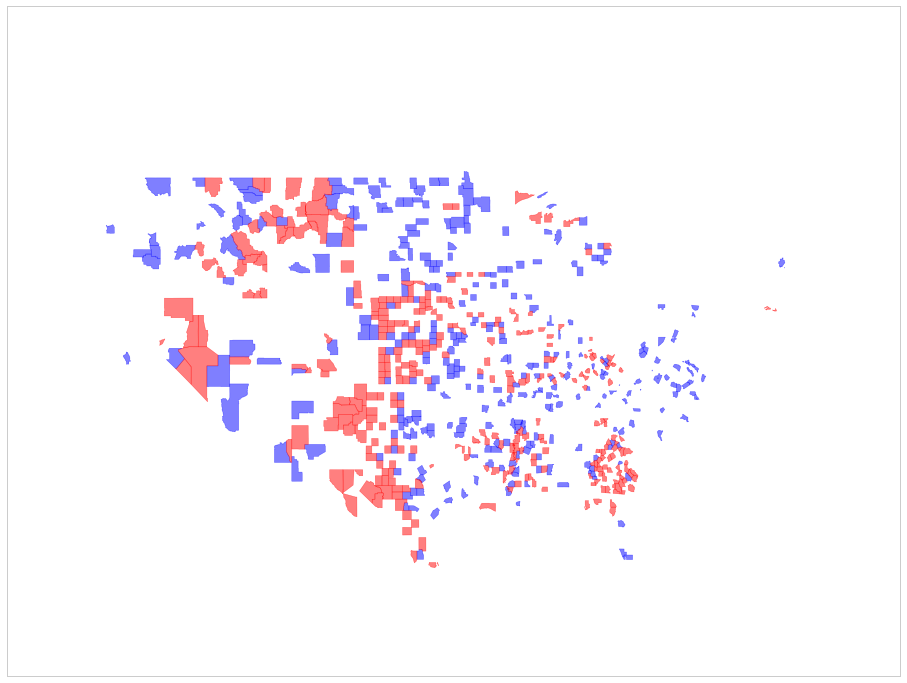

In [26]:
ax=make_map(top_kcancer_counties.countyfips, color="blue")
make_map(bot_kcancer_counties.countyfips, color="red", ax=ax)

Um, these are right next door.

(-1, 700000)

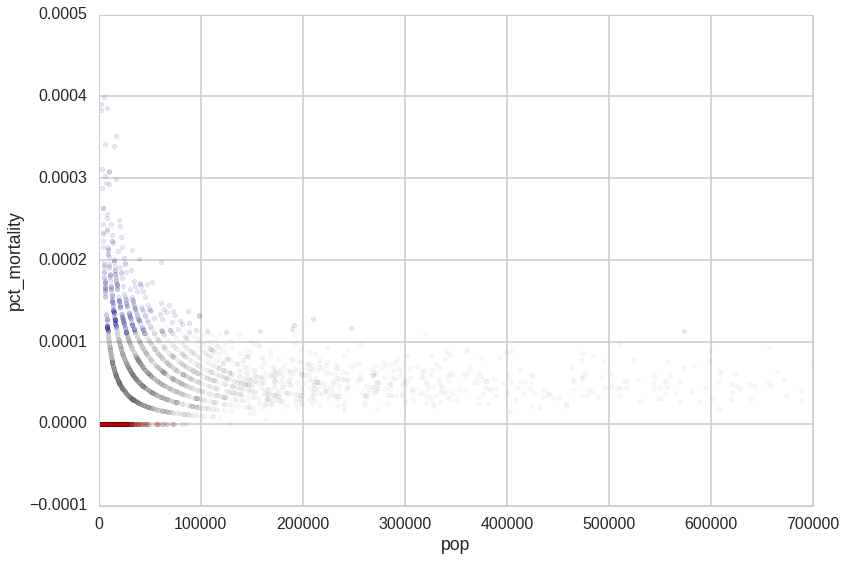

In [27]:
ax=dfk.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.05, color="grey")
top_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.07, color="blue", ax=ax)
bot_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.07, color="red", ax=ax)
plt.ylim([-0.0001, 0.0005])
plt.xlim([-1, 700000])

Plotting against the population of the county gives away the story. In a county with 1000 people, no cancers lowballs the likely rate and 1 cancer highballs it. Here is the same image on a log plot.

(-0.0001, 0.001)

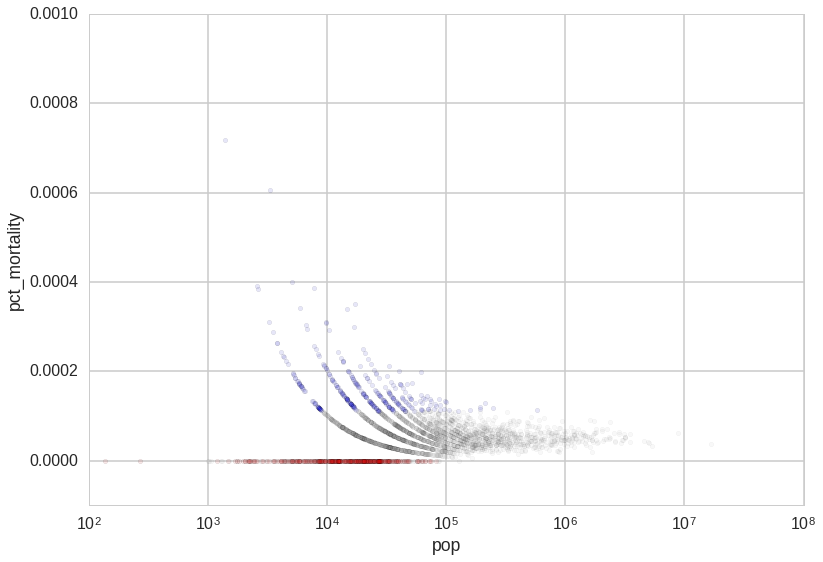

In [28]:
ax=dfk.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.05, color="grey", logx=True)
top_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.07, color="blue", ax=ax,logx=True)
bot_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.07, color="red", ax=ax,logx=True)
plt.ylim([-0.0001, 0.001])

What's a data analyst todo?

Recall the structure of the priors in the normal case and beta-binomial case. In situations where we do not have much data, the prior "means" or other quantities make a difference. In a sense, one can use priors to "regularize" or models.

Since we are dealing with count data here, we shall a use a poisson distribution to"generate" the counts. We have some choices.

####Full pooling

We just add all the counts and populatioms together over the nation, estimating one death-rate. This is too BIASed a model..its a very big bulldozer for a small nail. Too coarse grained.

#### Fullly un-pooled

We just use the death rate in each county separately. We know this does poorly on low population counties. VARIANCE!

####Partially pooled

What we want is a model which deferes to the data when there is enough: those counties with large populations, but regularizes the values from counties with small populations. What sort of a prior can help us here?

Why not borrow statistical strength from the overall average while not accepting it entirely? This leads naturally to the concept of a hierarchical model: one in which we have a separate poisson for each county, with a separate rate parameter for each county. But we assume that all of these rate parameters $\theta_j$ are draws from the same $Gamma(\alpha, \beta) distribution.

Modeling in this way has two advantages: (a) as we shall see, it helps us develop a computational strategy to solve the problem, and (b) it allows estimates of the probabilities of any one of the units (here, one of the experiments) to borrow strength from all the data as a whole through the estimation of the hyperparameters $\alpha$ and $\beta$. In other words, if some of the experiments had lower sample sizes or other outlier like behavior, the procedure helps "regularize" this.

In [29]:
from scipy.stats import poisson, gamma, nbinom

The likelihood is a product of poissons, each with a different rate parameter:

$$\cal L = \prod_{j} Poisson(y_{j}, 5\,\theta_{j}n_{j})$$

The prior is

$$p(\theta_{j}) \sim Gamma(\alpha, \beta)$$

The posterior distribution then simply turns out to be another Gamma!

$$p(\theta_{j} | \{y_j\}) \propto \cal L(\{y_j\} | \{\theta_{j}\}) \times p(\theta_{j}) \propto Gamma(\alpha + y_{j}, \beta + 5\,n_{j})$$

To calculate this postrior one MUST integrate or **marginalize** over all other parameters. Notice that all the poissons separate out.

In [30]:
#counts_j ~ poisson (n_j*theta_j)
prior = lambda theta, a,b: gamma.pdf(theta, a, 0., 1./b)
like1 = lambda yj, thetaj, nj: poisson.pmf(yj, 5.*thetaj*nj)
posterior = lambda thetaj,a,b,yj, nj: gamma.pdf(thetaj, a+yj, 0., 1./(b+5.*nj))


The mean of this posterior distribution is 

$$\frac{\alpha + y_{j}}{\beta + 5\,n_{j}}$$

which can be used to estimate the death rates in all the counties.

In [31]:
meanpost = lambda yj,nj,a,b: (a+yj)/(b + 5*nj)

The posterior predictive turns out to be simple too. Its a negative binomial distribution:

$$p(y^{*} | \{y_{j}\}) = NegBin(\alpha, \frac{\beta}{5\,n_{j}})$$

We can use this somewhat self-referentially on the same counties (or hold some out) to estimate the number of deaths in these counties. 


In [32]:
postpred = lambda y,a,b,nj: nbinom.pmf(y, a, b/(5.*nj))
meanpostpred=lambda nj, a,b: 5.*nj*(a/b)
varpostpred=lambda nj,a,b: meanpostpred(nj,a,b)*(1. +  meanpostpred(nj,a,b)/a)

###Empirical Bayes

Now here is the magic in the estimation of the parameter of the prior. We use the mean and the variance of the negative binomial distribution, respectively:

$$ 5\,n_{j}\frac{\alpha}{\beta}$$

and

$$ 5\,n_{j}\frac{\alpha}{\beta} + \left(5\,n_{j}\frac{\alpha}{\beta}\right)^{2}\frac{1}{\alpha}$$

and equate these to the empirically calculated mean and variance of the number of deaths: this fixes $\alpha$ and $\beta$ for us from all the data while the individual Gamma function posterior draws retain information from that counties contribution to the likelihood and thus only allow for partial pooling.

In [33]:
dfk.head()

,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


In [34]:
meany=dfk.dc.mean()
vary=dfk.dc.var()

In [35]:
meanpop=dfk['pop'].mean()

In [36]:
meanpopsquared=np.mean(dfk['pop']**2)

In [37]:
abyb=meany/(5.*meanpop)

In [38]:
est_a = (25.*meanpopsquared*abyb*abyb)/(vary - meany) 

In [39]:
est_b = est_a/abyb

In [40]:
est_a, est_b

(1.3281696847742108, 127630.55576870685)

In [41]:
abyb

1.0406361366796294e-05

Here we plot the empirical distribution of the rates

(array([ 515.,    7.,   34.,   56.,  100.,  121.,  154.,  162.,  159.,
         182.,  188.,  179.,  176.,  137.,  119.,   94.,   92.,   75.,
          77.,   52.,   53.,   42.,   42.,   35.,   24.,   30.,   22.,
          19.,   17.,   14.,   13.,    8.,    8.,   12.,   14.,    7.,
           7.,    6.,    8.,    4.,    5.,    2.,    4.,    3.,    4.,
           1.,    3.,    2.,    3.,    1.,    1.,    1.,    2.,    0.,
           0.,    0.,    0.,    1.,    2.,    1.,    1.,    2.,    1.,
           0.,    0.,    0.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    1.,    1.,    1.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
      

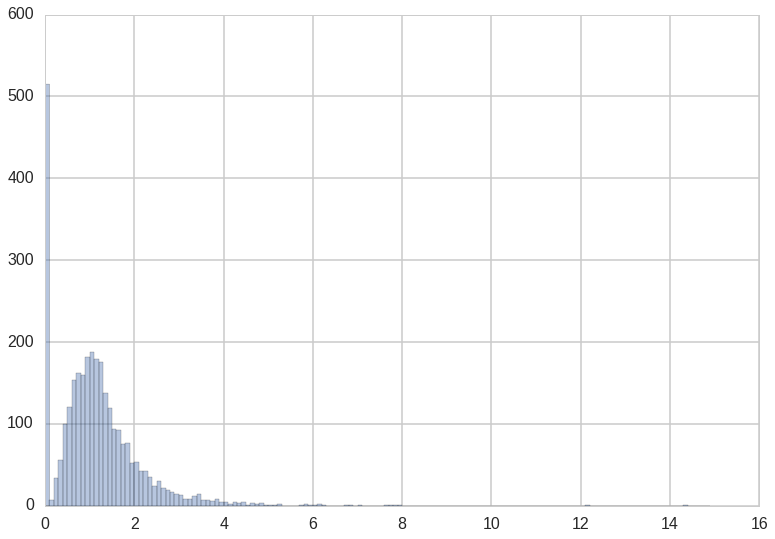

In [42]:
binx=np.arange(0, 15, 0.1)
plt.hist(100000*dfk.dc/(5.*dfk['pop']), bins=binx, alpha=0.4);
#plt.plot(binx, [prior(t/100000.0, est_a, est_b) for t in binx]);

And here we see the posterior rates on the old plot...see how they are regularized to be in a sensible channel?

(-0.0001, 0.0003)

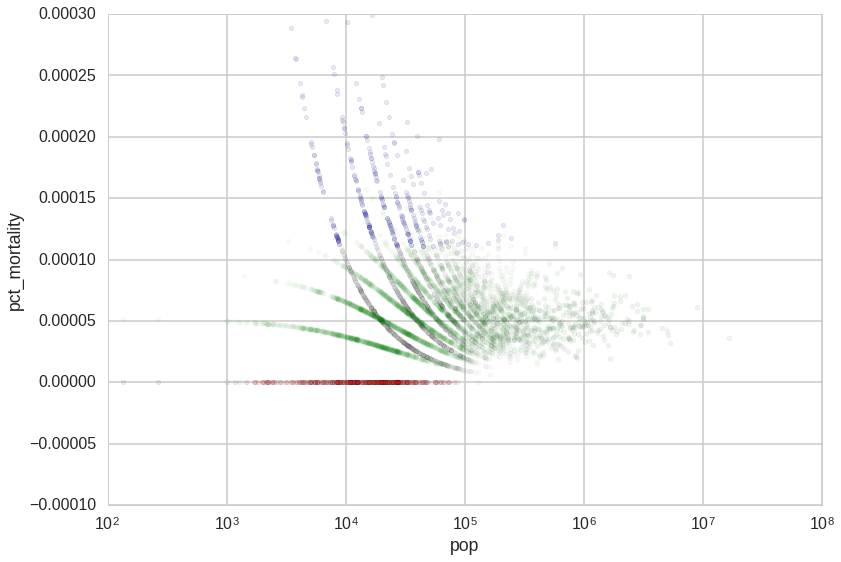

In [43]:
ax=dfk.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.05, color="grey", logx=True)
top_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.07, color="blue", ax=ax,logx=True)
bot_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.07, color="red", ax=ax,logx=True)
vals=zip(dfk['dc'], dfk['pop'])
meanposts=[meanpost(yjay, njay, est_a, est_b) for (yjay, njay) in vals]
ax.plot(dfk['pop'], 5*np.array(meanposts), '.', alpha=0.04, color="green")
plt.ylim([-0.0001, 0.0003])

Finally we note that the posterior predictive deaths forecast (blue dots are rotated) towards a flat line: ie they are regularized and are shrinking to a commonish mean!

In [44]:
meanpostpreds = dfk['pop'].apply(lambda nj: meanpostpred(nj, est_a, est_b))
errorpostpreds= dfk['pop'].apply(lambda nj: np.sqrt(varpostpred(nj, est_a, est_b)))

(0, 300)

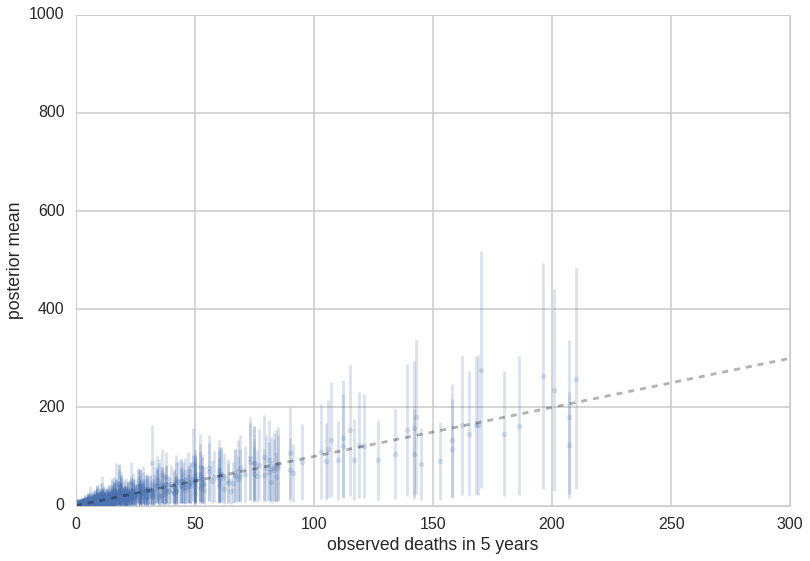

In [45]:
plt.errorbar(dfk['dc'], 
             meanpostpreds, 
             yerr=[errorpostpreds ,errorpostpreds],
             fmt='.', alpha=0.2)
plt.plot([0,600],[0,600],'k--', alpha=0.3)
plt.xlabel("observed deaths in 5 years")
plt.ylabel("posterior mean")
plt.ylim([0,1000])
plt.xlim([0,300])